<hr style="border:2px solid gray">

# Outlier Investigation
*Task:* Identify the appropriate contamination parameter for the Isolation Forest algorithm 

***Contributors***
- Adam

<hr style="border:2px solid gray">


### Importing modules

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

### Loading in the data

In [2]:
data_directory = './airbnb/Data/'
df = pd.DataFrame()
for filename in os.listdir(data_directory):
    newdf = pd.read_csv(f'{data_directory}/{filename}')
    newdf['city'] = filename.split('_')[0]
    newdf['listing_days'] = filename.split('_')[1].split('.')[0]
    df = pd.concat([df, newdf ], ignore_index=True, axis=0)

# Removing uninformative columns
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
# Getting rid of target column
df = df.drop('realSum', axis=1)
df = df.select_dtypes(include=[np.number])

### PCA plot to look for outliers

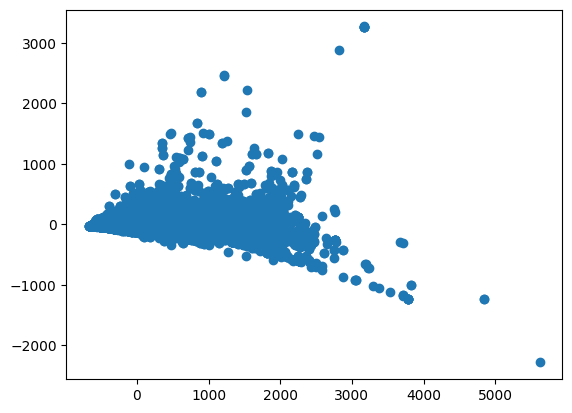

In [4]:
pca = PCA(n_components=2)
pca.fit(df)
to_plot = pca.transform(df)
to_plot = pd.DataFrame(to_plot, columns = ['PCA1','PCA2'])
plt.scatter(x=to_plot.PCA1, y=to_plot.PCA2)

Which points are detected as outliers with isolation forest?

<Axes: xlabel='PCA1', ylabel='PCA2'>

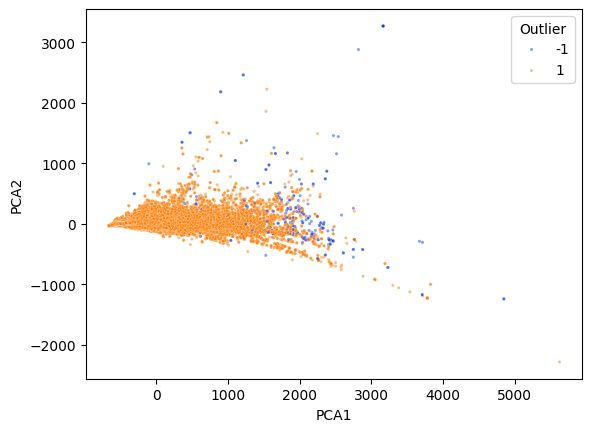

In [5]:
isolation_forest = IsolationForest(random_state=42, contamination=0.01).fit(df)
outlier_indices = isolation_forest.predict(df)
to_plot['Outlier'] = outlier_indices
sns.scatterplot(x=to_plot.PCA1, y=to_plot.PCA2, hue=to_plot.Outlier, s=5, alpha=0.5, palette='bright')

It seems that Isolation Forest is missing some of the biggest outliers in the data, lets try upping the contamination and seeing the results

<Axes: xlabel='PCA1', ylabel='PCA2'>

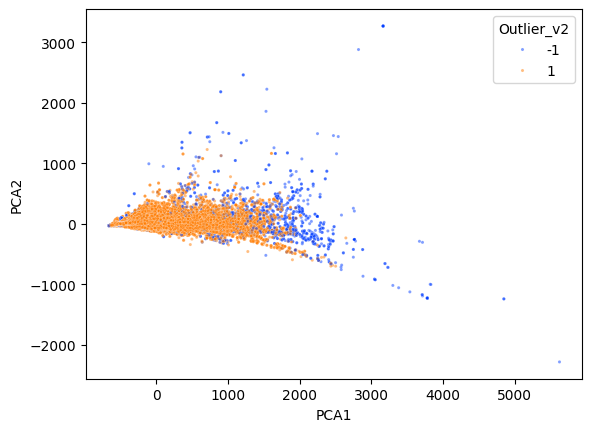

In [6]:
isolation_forest_v2 = IsolationForest(random_state=42, contamination=0.05).fit(df)
outlier_indices_v2 = isolation_forest_v2.predict(df)
to_plot['Outlier_v2'] = outlier_indices_v2
sns.scatterplot(x=to_plot.PCA1, y=to_plot.PCA2, hue=to_plot.Outlier_v2, s=5, alpha=0.5, palette='bright')

It seems that a contamination level of .05 does a better job of catching all of the visual outliers. However, it also is throwing out more data that do not appear to be outliers. This is a tradeoff. I am not sure which is the best

Lets try a really small contamination level.

<Axes: xlabel='PCA1', ylabel='PCA2'>

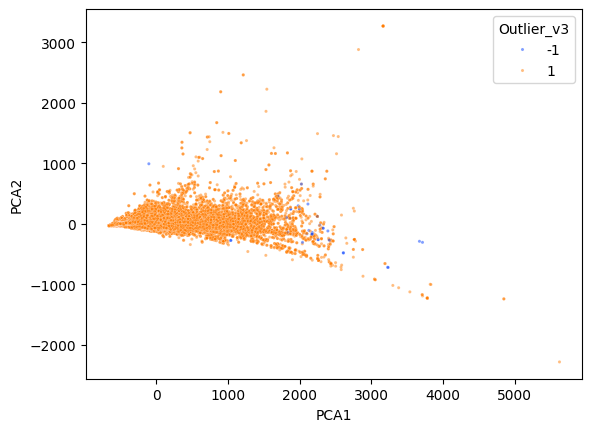

In [7]:
isolation_forest_v3 = IsolationForest(random_state=42, contamination=0.001).fit(df)
outlier_indices_v3 = isolation_forest_v3.predict(df)
to_plot['Outlier_v3'] = outlier_indices_v3
sns.scatterplot(x=to_plot.PCA1, y=to_plot.PCA2, hue=to_plot.Outlier_v3, s=5, alpha=0.5, palette='bright')

This isn't picking up on enough outliers. I am curious what happens if we do PCA after log transforming the data.

### Log transform

In [8]:
# Converting features to logarithms
df_log = df.copy()
to_log_features = ['dist','metro_dist','attr_index','attr_index_norm','rest_index','rest_index_norm']
for feature in to_log_features:
    df_log[feature] = np.log10(df[feature])

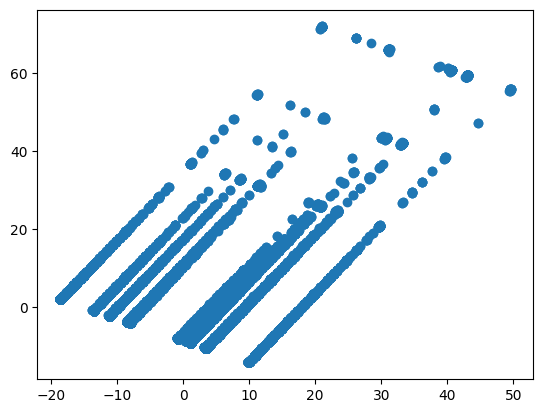

In [9]:
pca_log = PCA(n_components=2)
pca_log.fit(df_log)
to_plot_log = pca_log.transform(df_log)
to_plot_log = pd.DataFrame(to_plot_log, columns = ['PCA1','PCA2'])
plt.scatter(x=to_plot_log.PCA1, y=to_plot_log.PCA2)

<Axes: xlabel='PCA1', ylabel='PCA2'>

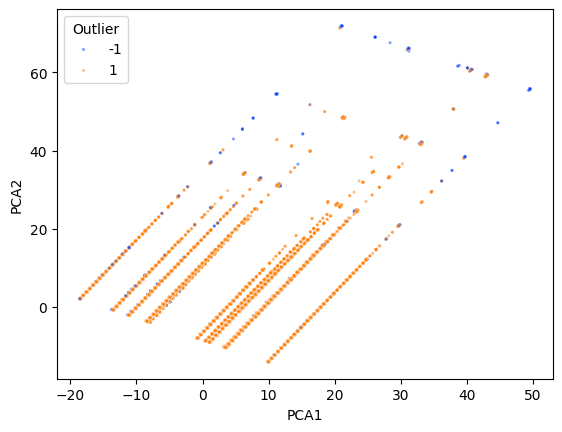

In [13]:
isolation_forest_log = IsolationForest(random_state=42, contamination=0.01).fit(df_log)
outlier_indices = isolation_forest_log.predict(df_log)
to_plot_log['Outlier'] = outlier_indices
sns.scatterplot(x=to_plot_log.PCA1, y=to_plot_log.PCA2, hue=to_plot_log.Outlier, s=5, alpha=0.5, palette='bright')

In [14]:
df_log

,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,2.0,1,0,10.0,93.0,1,0.700960,0.404728,1.895922,0.619793,1.992350,0.835467,4.90569,52.41772
1,4.0,0,0,8.0,85.0,1,-0.311234,-0.620869,2.800151,1.524022,2.922871,1.765988,4.90005,52.37432
2,2.0,0,1,9.0,87.0,1,0.759540,0.562486,1.876656,0.600527,1.979489,0.822606,4.97512,52.36103
3,4.0,0,1,9.0,90.0,2,-0.414695,-0.356670,2.693087,1.416958,2.942024,1.785142,4.89417,52.37663
4,2.0,0,0,10.0,98.0,1,-0.263812,-0.496628,2.742592,1.466463,2.911320,1.754438,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,6.0,0,1,10.0,100.0,3,-0.275576,-0.868230,2.341242,1.196236,2.642224,1.025494,16.37940,48.21136
51703,2.0,0,0,8.0,86.0,1,-0.091405,-0.996371,2.311691,1.166685,2.534258,0.917528,16.38070,48.20296
51704,2.0,0,0,10.0,93.0,1,-0.002591,-0.693492,2.228075,1.083070,2.450705,0.833975,16.38568,48.20460
51705,2.0,0,0,10.0,87.0,1,0.483459,-0.541461,2.038368,0.893362,2.200203,0.583473,16.34100,48.19200


This is a strange pattern. I'm not sure why there are parallel lines. My best guess is that after log transforming the 'best' variables for dimension reduction might have been `cleanliness_rating` which has 10 different possible ratings, which would explain why there are 10 different lines. It seems to me that isolation forest doesn't do any better distinguishing outliers after log transforming; therefore, we will remove outliers before doing log transforms.

### Conclusion

We will use isolation forest with a `contamination` level of **0.01**. It is missing some visual outliers; however, I am afraid that 0.05 throws out too many points that aren't really outliers.